In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

Classes: Nonowner, Owner


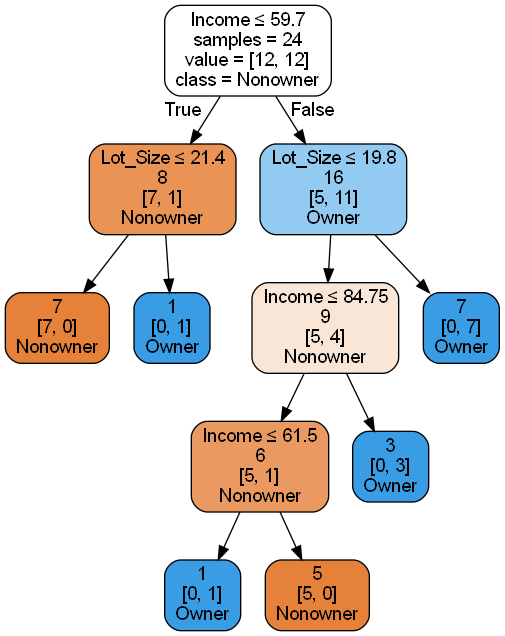

In [3]:
mower_df = pd.read_csv('RidingMowers.csv')
# use max_depth to control tree size (None = full tree)
classTree = DecisionTreeClassifier(random_state=20, max_depth=10)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

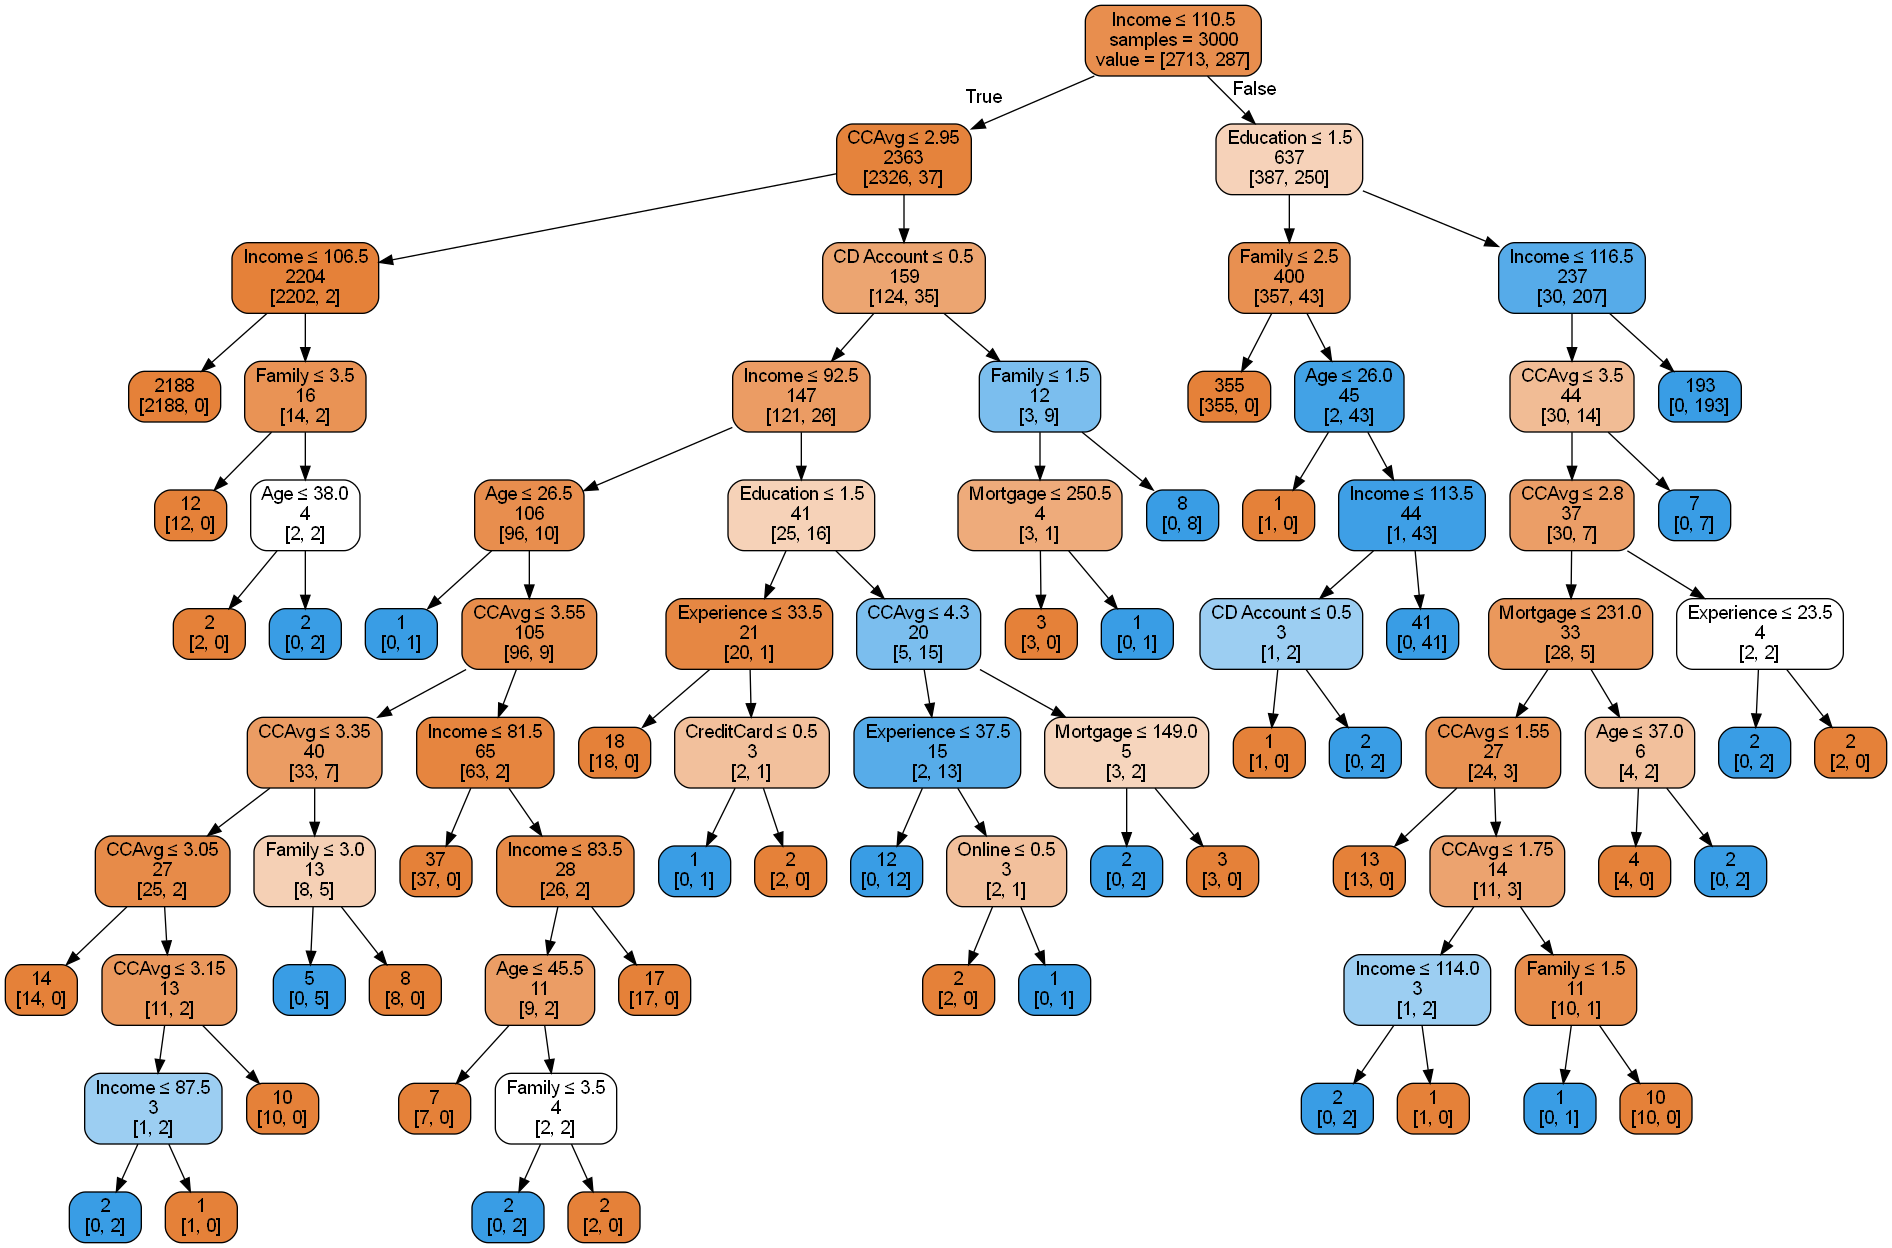

In [4]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [5]:
from sklearn.tree import DecisionTreeRegressor
toyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv').iloc[:1000,:]


In [6]:
toyotaCorolla_df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [7]:
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 
              'Doors', 'Weight']
outcome = 'Price'


In [8]:

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [9]:

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}


In [10]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}


Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [11]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)


Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


In [12]:

regTree = gridSearch.best_estimator_

regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1075.6372
            Mean Absolute Error (MAE) : 775.1639
          Mean Percentage Error (MPE) : -0.8563
Mean Absolute Percentage Error (MAPE) : 6.9488

Regression statistics

                      Mean Error (ME) : 95.2392
       Root Mean Squared Error (RMSE) : 1557.9915
            Mean Absolute Error (MAE) : 1011.2680
          Mean Percentage Error (MPE) : -0.9460
Mean Absolute Percentage Error (MAPE) : 9.0627
